## Analysis of Python Vacancies on DOU.ua

In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Task 1

#### Analytics of most frequently mentioned technologies


1. Create dataframe on earlier prepared csv file from parsed Python vacancies
2. Split the requirements column and count the occurences
3. Highlight 20 most frequently required technology and count the number of its occurences
4. Build plot bar to show up 20 the most required technologies


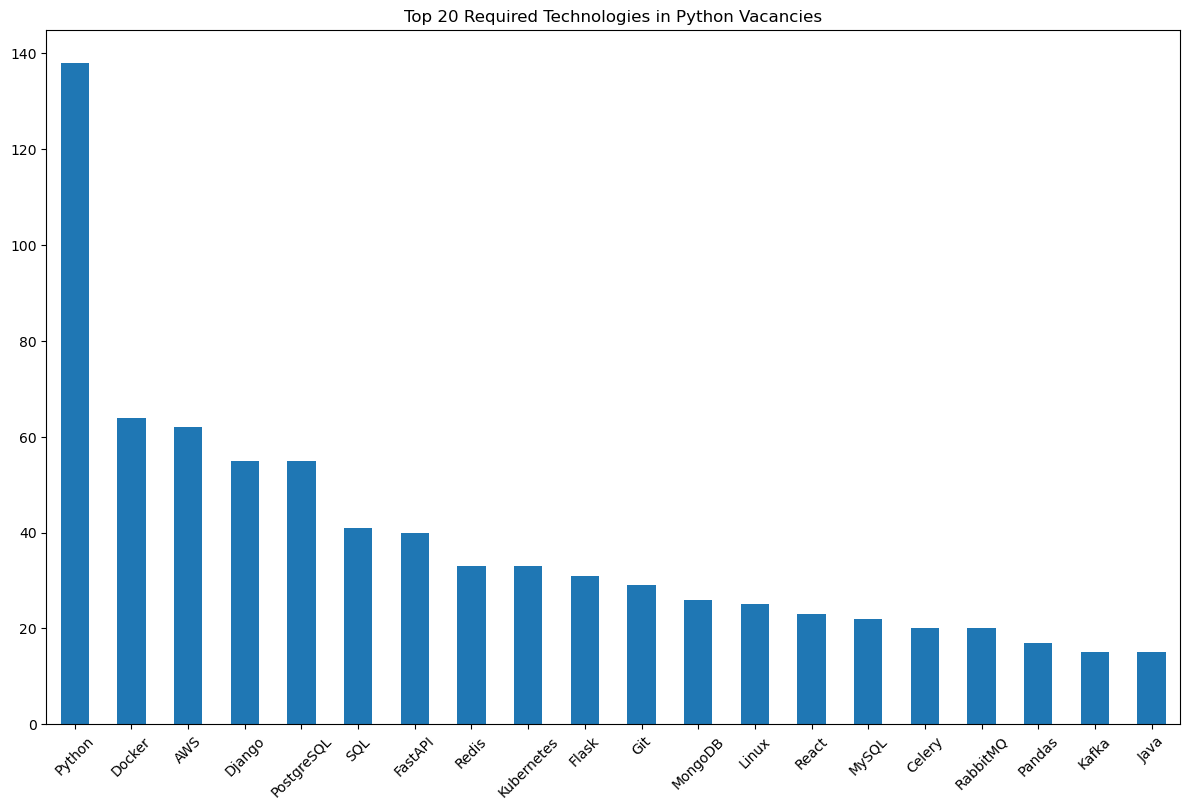

In [2]:
file_path = "../data/vacancies.csv"
vacancies_df = pd.read_csv(file_path, index_col=0)

requirements_series = vacancies_df["Requirements"].str.split(",")
all_requirements = [re.sub(r"[\['\]]", "", req.strip()) for req_list in requirements_series for req in req_list]

technologies_series = pd.Series(all_requirements)
technologies_counts = technologies_series.value_counts()

top_20_technologies = technologies_counts.head(20)

top_20_technologies.plot(kind="bar", figsize=(12, 8))
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Top 20 Required Technologies in Python Vacancies")

plt.show()

## Task 2

#### Analyzing Technology Requirements by Experience Level

1. Creates a copy of the original DataFrame to avoid modifying it
2. For each top 20 technology, creates a boolean column indicating if that technology is required
3. Groups the data by experience level and sums the requirements
4. Plots the results as a line graph to show number of mentions popular_technologies on each experience level


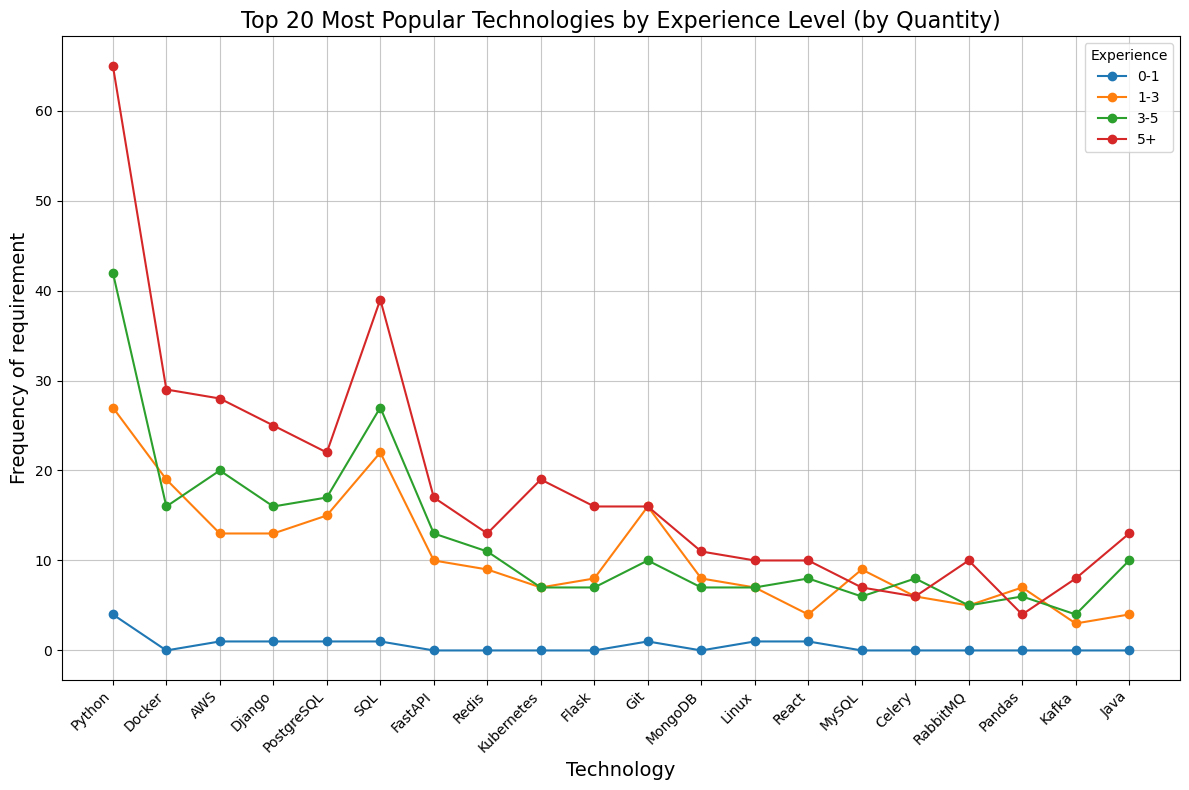

In [3]:
vacancies_extended = vacancies_df.copy()

for tech in top_20_technologies.index:
    vacancies_extended[tech] = vacancies_extended["Requirements"].apply(lambda x: tech in x)    

tech_by_experience = vacancies_extended.groupby("Experience")[top_20_technologies.index].sum()

plt.figure(figsize=(12, 8))

tech_by_experience.T.plot(kind="line", marker="o", ax=plt.gca())

plt.title("Top 20 Most Popular Technologies by Experience Level (by Quantity)", fontsize=16)
plt.ylabel("Frequency of requirement", fontsize=14)
plt.xlabel("Technology", fontsize=14)

plt.xticks(range(len(top_20_technologies.index)), top_20_technologies.index, rotation=45, ha="right")
plt.subplots_adjust(bottom=0.2)

plt.grid(True, axis="both", linestyle="-", alpha=0.7)

plt.tight_layout()

plt.show()

## Task 3

#### Analyzing Technology Requirements by Experience Level (by Percentage)


1. Extract the experience column from DataFrame 
2. Calculate percentage of each technology occurences for every experience level
3. Plots the results as a line graph to show trends required technologies with based on experience


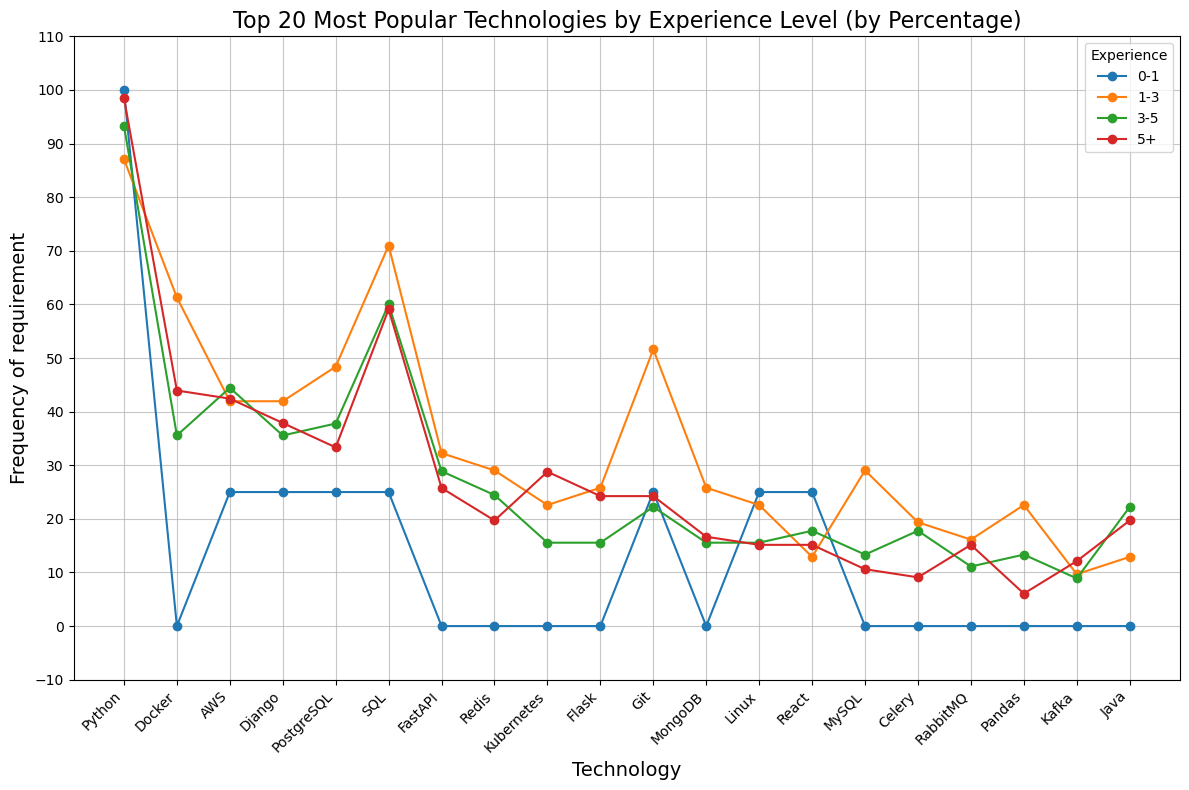

In [4]:
experience_total = vacancies_extended["Experience"].value_counts()
tech_by_experience_percentage = tech_by_experience.div(experience_total, axis=0).multiply(100)

plt.figure(figsize=(12, 8))

tech_by_experience_percentage.T.plot(kind="line", marker="o", ax=plt.gca())

plt.title("Top 20 Most Popular Technologies by Experience Level (by Percentage)", fontsize=16)
plt.ylabel("Frequency of requirement", fontsize=14)
plt.xlabel("Technology", fontsize=14)

plt.ylim(0, 100)
plt.yticks(range(-10, 111, 10))
plt.xticks(range(len(top_20_technologies.index)), top_20_technologies.index, rotation=45, ha="right")

plt.grid(True, axis="both", linestyle="-", alpha=0.7)

plt.tight_layout()

plt.show()


## Task 4

#### Vacancies analysis by location

1. Extract the city column from DataFrame
2. Clean the value of the cities to get more clear accessible to understand analytics
3. Count the number of each city occurences
4. Plots the result as a bar graph to show the number of occurences each city in vacancies

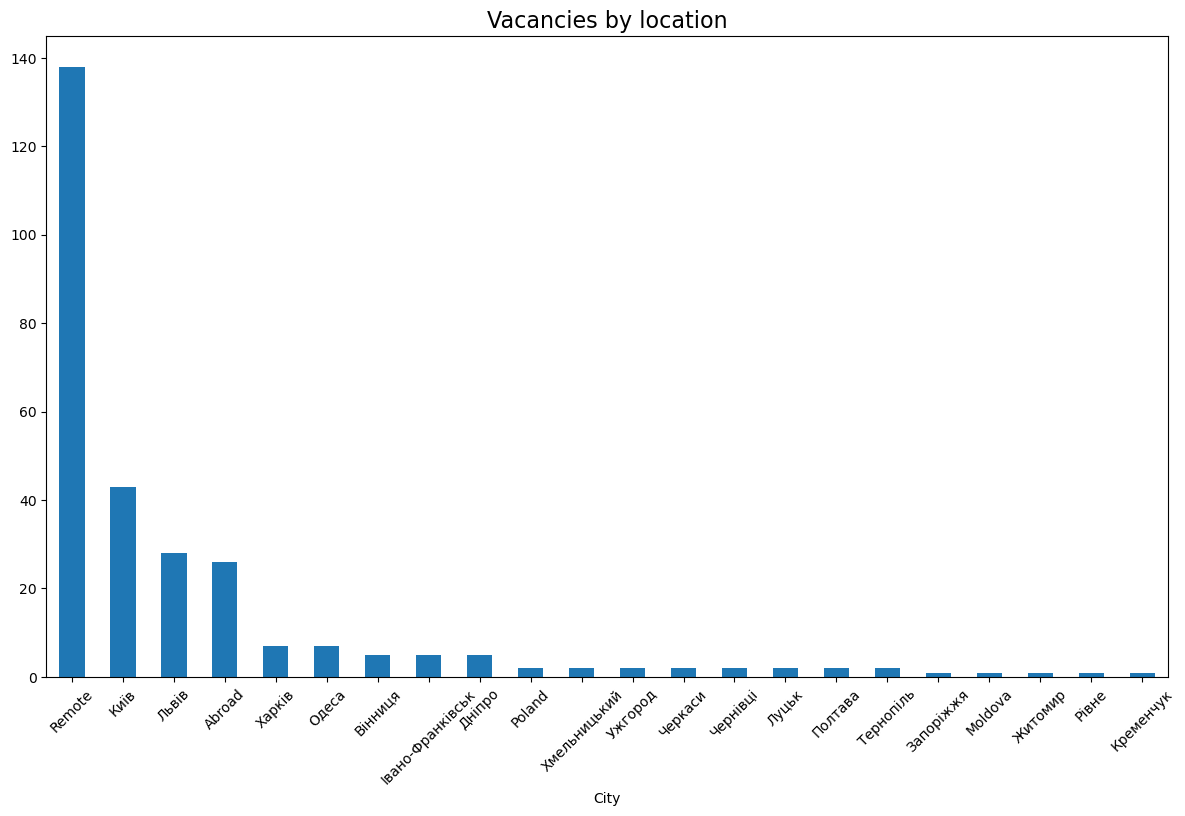

In [5]:
city_series = vacancies_df["City"].str.split(",").explode().str.strip()

def clean_cities(city_name):
    city_name = city_name.split(",")[0].strip()
    
    if re.search(r"remote|глобальний|за кордоном|hybrid|віддалено|гібрид", city_name, re.IGNORECASE):
        return "Remote"
    
    if re.search(r"\(.*\)", city_name):
        return "Abroad"
    
    return city_name

cleaned_cities = city_series.apply(clean_cities).dropna() 

cities_counts = cleaned_cities.value_counts()

cities_counts.plot(kind="bar", figsize=(12, 8))
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Vacancies by location", fontsize=16)

plt.show()

## Task 5

#### Vacancy analysis by required Experience

1. Extract the experience column from DataFrama
2. Format the experience to more descriptive format
3. Count the occurrences of each experience level
4. Plots the result as a bar graph to visualize the number of vacancies by experience level  


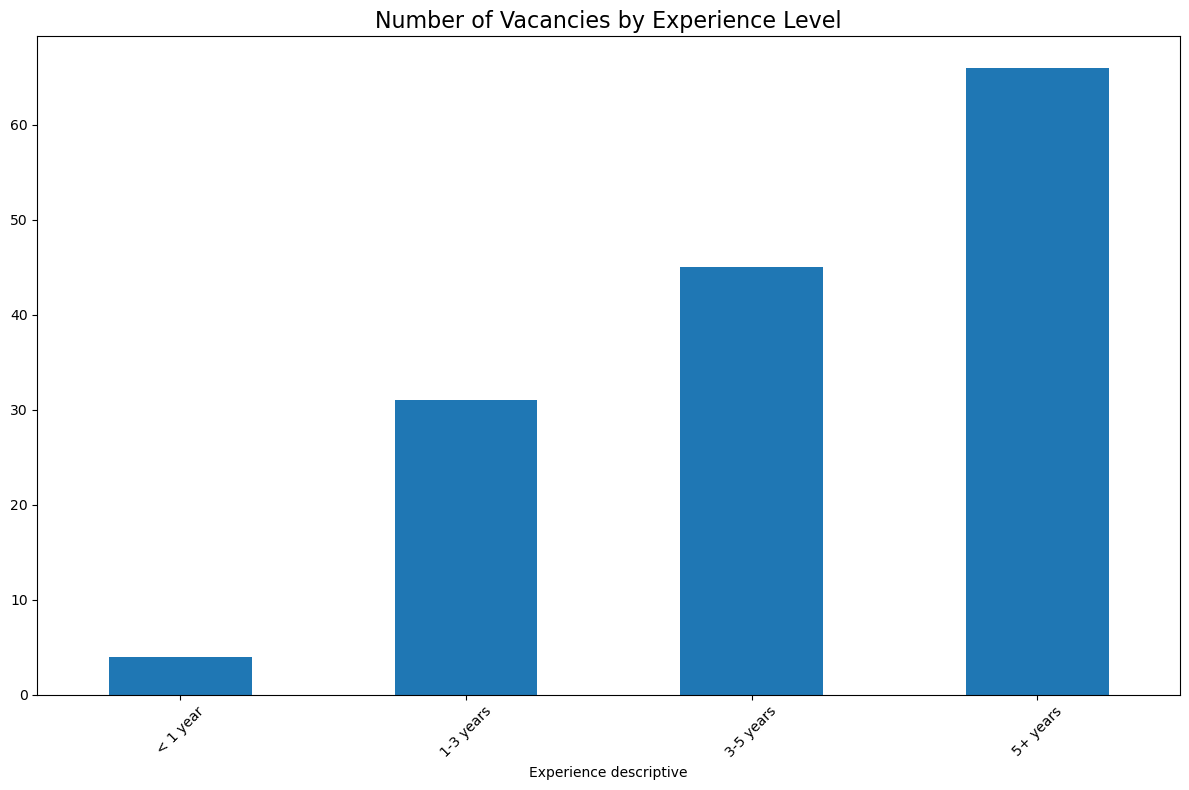

In [149]:
experience_level = {
   "0-1": "< 1 year",
    "1-3": "1-3 years",
    "3-5": "3-5 years",
    "5+": "5+ years"
}
vacancies_extended["Experience descriptive"] = vacancies_extended["Experience"].map(experience_level)

experience_counts = vacancies_extended["Experience descriptive"].value_counts(ascending=True)

experience_counts.plot(kind="bar", figsize=(12, 8))
plt.xticks(rotation=45)
plt.title("Number of Vacancies by Experience Level", fontsize=16)
plt.tight_layout()

plt.show()